# A/B Testing

## ¿Qué es el A/B Testing?

El A/B testing es una metodología que permite comparar dos versiones de algo para determinar cuál funciona mejor. En finanzas, esto se traduce en comparar diferentes estrategias de inversión para determinar cuál podría ofrecer mejores resultados bajo las mismas condiciones.

## ¿Por qué es importante en Finanzas?

1. **Validación de Estrategias**
   - Permite comparar diferentes enfoques de inversión
   - Ayuda a tomar decisiones basadas en datos
   - Reduce el sesgo emocional en la inversión

2. **Gestión de Riesgo**
   - Evalúa el comportamiento de diferentes estrategias en distintos escenarios
   - Permite identificar debilidades y fortalezas
   - Ayuda a entender los trade-offs entre riesgo y rendimiento

3. **Optimización de Carteras**
   - Facilita la comparación de diferentes asignaciones de activos
   - Permite evaluar el impacto de diferentes reglas de rebalanceo
   - Ayuda a encontrar la mejor estrategia para nuestros objetivos

## Ejemplo Práctico: Comparación de Estrategias de Inversión

### Las Estrategias

1. **Estrategia A: Cartera 60/40**
   - 60% en renta variable (S&P 500)
   - 40% en bonos del gobierno
   - Rebalanceo periódico
   - Enfoque tradicional y conservador

2. **Estrategia B: Paridad de Riesgo Simple**
   - Asignación basada en volatilidad
   - Ajuste por rendimiento histórico
   - Enfoque más dinámico

### Métricas

1. **Rendimiento**
   - Retorno total
   - Retorno anualizado
   - Ratio de Sharpe

2. **Riesgo**
   - Volatilidad
   - Drawdown máximo
   - Value at Risk



In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

### Obtención de datos, cálculo de métricas y cálculo de estrategias

In [4]:
def get_data(tickers, start_date, end_date):
    """Descarga datos financieros"""
    data = yf.download(tickers, start_date, end_date)['Adj Close']
    returns = data.pct_change().dropna()
    return data, returns

def calculate_metrics(returns, risk_free_rate=0.02):
    """Calcula métricas básicas de rendimiento"""
    # Métricas anualizadas
    annual_return = returns.mean() * 252
    annual_vol = returns.std() * np.sqrt(252)
    sharpe = (annual_return - risk_free_rate) / annual_vol
    
    # Drawdown
    cum_returns = (1 + returns).cumprod()
    rolling_max = cum_returns.expanding().max()
    drawdowns = (cum_returns - rolling_max) / rolling_max
    max_drawdown = drawdowns.min()
    
    return {
        'return': annual_return,
        'volatility': annual_vol,
        'sharpe': sharpe,
        'max_drawdown': max_drawdown
    }

def strategy_60_40(returns):
    """Implementa estrategia 60/40"""
    weights = np.array([0.6, 0.4])
    port_returns = (returns * weights).sum(axis=1)
    return port_returns

def strategy_risk_parity(returns):
    """Implementa estrategia de paridad de riesgo simple"""
    # Calcula volatilidades inversas para los pesos
    vols = returns.std()
    weights = 1/vols
    weights = weights/weights.sum()
    
    port_returns = (returns * weights).sum(axis=1)
    return port_returns

### Gráficos

In [5]:
def plot_comparison(returns_a, returns_b):
    """Visualiza la comparación de estrategias"""
    cum_returns_a = (1 + returns_a).cumprod()
    cum_returns_b = (1 + returns_b).cumprod()
    
    plt.figure(figsize=(12, 6))
    plt.plot(cum_returns_a, label='Estrategia 60/40', color='blue')
    plt.plot(cum_returns_b, label='Paridad de Riesgo', color='green')
    plt.title('Comparación de Estrategias')
    plt.xlabel('Fecha')
    plt.ylabel('Rendimiento Acumulado')
    plt.legend()
    plt.grid(True)
    plt.show()

### Función principal

[*********************100%%**********************]  2 of 2 completed



Resultados Estrategia 60/40:
return: 7.96%
volatility: 11.19%
sharpe: 53.30%
max_drawdown: -27.24%

Resultados Paridad de Riesgo:
return: 6.28%
volatility: 10.34%
sharpe: 41.40%
max_drawdown: -29.01%


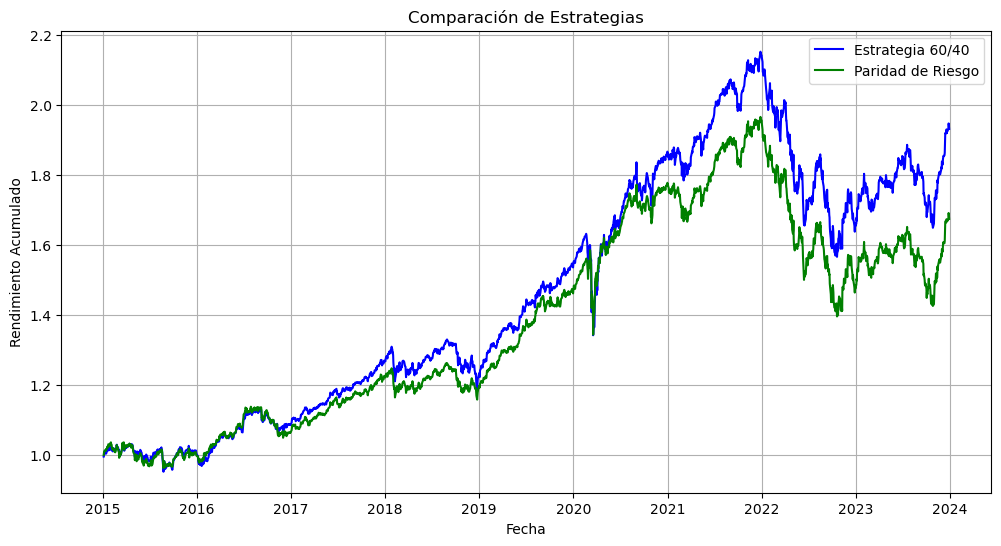

In [6]:
def main():
    # Parámetros
    tickers = ['SPY', 'TLT']
    start_date = "2015-01-01"
    end_date = "2024-01-01"
    
    # Obtener datos
    data, returns = get_data(tickers, start_date, end_date)
    
    # Ejecutar estrategias
    returns_60_40 = strategy_60_40(returns)
    returns_risk_parity = strategy_risk_parity(returns)
    
    # Calcular métricas
    metrics_60_40 = calculate_metrics(returns_60_40)
    metrics_rp = calculate_metrics(returns_risk_parity)
    
    # Imprimir resultados
    print("\nResultados Estrategia 60/40:")
    for k, v in metrics_60_40.items():
        print(f"{k}: {v:.2%}")
        
    print("\nResultados Paridad de Riesgo:")
    for k, v in metrics_rp.items():
        print(f"{k}: {v:.2%}")
    
    # Visualizar resultados
    plot_comparison(returns_60_40, returns_risk_parity)

if __name__ == "__main__":
    main()

1. Rendimiento General:
- La estrategia 60/40 obtuvo un retorno anual del 7.96% vs 6.28% de la Paridad de Riesgo
- La diferencia de rendimiento (1.68%) es significativa a largo plazo
- En el gráfico se observa que la estrategia 60/40 (azul) mantiene una ventaja consistente, especialmente desde 2021

2. Riesgo:
- La volatilidad es ligeramente menor en la Paridad de Riesgo (10.34% vs 11.19%)
- Sin embargo, el máximo drawdown es peor en la Paridad de Riesgo (-29.01% vs -27.24%)
- Esto sugiere que la Paridad de Riesgo, aunque más estable en general, puede tener caídas más pronunciadas

3. Eficiencia:
- El ratio de Sharpe es superior en la estrategia 60/40 (53.30% vs 41.40%)
- Esto indica que la estrategia 60/40 proporciona mejor rendimiento ajustado por riesgo
- La diferencia en Sharpe es sustancial y favorece claramente a la estrategia tradicional

4. Análisis por Períodos:
- 2015-2019: Rendimiento similar entre ambas estrategias
- 2020 (Crisis COVID): Ambas estrategias sufren, pero se recuperan de manera similar
- 2021-2024: La estrategia 60/40 muestra una clara superioridad
- 2022-2023: Mayor volatilidad en ambas estrategias, pero la 60/40 mantiene mejor rendimiento

5. Conclusiones Clave:
- La estrategia tradicional 60/40 demuestra ser más robusta en este período
- La supuesta ventaja de la Paridad de Riesgo en términos de estabilidad es marginal
- El mejor rendimiento de la 60/40 no viene con un costo significativo en términos de riesgo
- La simplicidad de la estrategia 60/40 la hace más atractiva dado sus mejores resultados

6. Consideraciones Importantes:
- Este período incluye un mercado alcista prolongado en acciones
- La subida de tasas de interés en 2022-2023 afectó a ambas estrategias
- La estrategia 60/40 se benefició de la mayor exposición a renta variable en un período favorable

7. Recomendaciones:
- La estrategia 60/40 parece ser la opción más adecuada para este conjunto de activos
- Se podría considerar ajustar la Paridad de Riesgo para incluir más activos o modificar su implementación
- El período analizado (2015-2024) puede no ser representativo de todos los ciclos de mercado